In [30]:
import json
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from pprint import pprint as pp

skynet_data="../../skynet-data/data"

In [34]:
with open(skynet_data + "/classes.json") as f:
    classes = json.load(f)

pp(classes)

[{'color': '#010101',
  'filter': "[landuse] = 'residential'",
  'name': 'residential',
  'sourceLayer': 'osm',
  'stroke-width': '1'},
 {'color': '#020202',
  'filter': "[landuse] = 'commercial'",
  'name': 'commercial',
  'sourceLayer': 'osm',
  'stroke-width': '1'},
 {'color': '#030303',
  'filter': "[landuse] = 'industrial'",
  'name': 'industrial',
  'sourceLayer': 'osm',
  'stroke-width': '1'},
 {'color': '#040404',
  'filter': "([natural] = 'wood') or ([landuse] = 'forest') or ([landuse] = "
            "'tree_row') or ([landuse] = 'tree') or ([landuse] = 'scrub') or "
            "([landuse] = 'heath') or ([landuse] = 'grassland') or ([landuse] "
            "= 'orchard') or ([landuse] = 'farmland') or ([landuse] = 'tree') "
            "or ([landuse] = 'allotments') or ([surface] = 'grass') or "
            "([landuse] = 'meadow') or ([landuse] = 'vineyard')",
  'name': 'vegetation',
  'sourceLayer': 'osm',
  'stroke-width': '1'},
 {'color': '#050505',
  'filter': "[building].

In [3]:
# images with _at least_ 1 labeled pixel.
non_empty = pd.read_csv("../../skynet-data/data/sample-filtered.txt", sep=" ", header=None)
non_empty.head()

,0,1,2,3,4,5,6,7,8,9,10
0,data/osm/united_kingdom.mbtiles,17,64332,43586,0,0,0,56206,0,0,9330
1,data/osm/united_kingdom.mbtiles,17,64333,43586,0,0,0,53577,0,0,11959
2,data/osm/united_kingdom.mbtiles,17,64333,43588,0,0,0,15342,0,0,50194
3,data/osm/united_kingdom.mbtiles,17,64328,43590,0,0,0,58878,0,0,6658
4,data/osm/united_kingdom.mbtiles,17,64333,43595,0,0,0,36347,0,0,29189


In [4]:
non_empty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3669 entries, 0 to 3668
Data columns (total 11 columns):
0     3669 non-null object
1     3669 non-null int64
2     3669 non-null int64
3     3669 non-null int64
4     3669 non-null int64
5     3669 non-null int64
6     3669 non-null int64
7     3669 non-null int64
8     3669 non-null int64
9     3669 non-null int64
10    3669 non-null int64
dtypes: int64(10), object(1)
memory usage: 315.4+ KB


In [5]:
non_empty.describe()

,1,2,3,4,5,6,7,8,9,10
count,3669.0,3669.000000,3669.000000,3669.000000,3669.000000,3669.000000,3669.000000,3669.000000,3669.000000,3669.000000
mean,17.0,64496.603979,43536.263560,3451.636686,758.171709,430.975198,25636.948487,1110.483783,15.662851,34132.121286
std,0.0,112.380167,95.789516,13997.844149,6508.962097,4985.352699,25761.731030,4132.441206,868.972760,26197.278658
min,17.0,64288.000000,43360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.0,64395.000000,43466.000000,0.000000,0.000000,0.000000,543.000000,0.000000,0.000000,1820.000000
50%,17.0,64508.000000,43540.000000,0.000000,0.000000,0.000000,15654.000000,0.000000,0.000000,40410.000000
75%,17.0,64601.000000,43606.000000,0.000000,0.000000,0.000000,53100.000000,0.000000,0.000000,60414.000000
max,17.0,64671.000000,43743.000000,65536.000000,65468.000000,65536.000000,65536.000000,65536.000000,52392.000000,65535.000000


In [6]:
# class counts
non_empty.iloc[:,4:].apply(lambda x: np.sum(x > 0))

4      223
5       52
6       28
7     2987
8      610
9        4
10    2894
dtype: int64

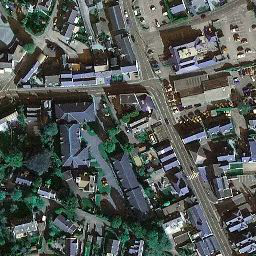

In [186]:
#cat -n ../sample-filtered.txt |grep "64504 43697"
sample = non_empty.iloc[1589]
sample_file = "{}/images/{}-{}-{}.jpg".format(skynet_data, *sample[1:4])
sample_img = cv2.imread(sample_file)
Image.fromarray(sample_img)

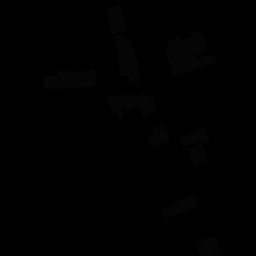

In [187]:
label_file = "{}/labels/color/{}-{}-{}.png".format(skynet_data, *sample[1:4])
label_img = cv2.imread(label_file)
Image.fromarray(label_img)

In [148]:
np.max(label_img[:,:,0])

5

In [263]:
# just for visualising the masks.
def class_to_colour(x):
    # http://colorbrewer2.org/#type=qualitative&scheme=Set1&n=6
    colours = [[0xff, 0xff, 0xff],
               [0xe4, 0x1a, 0x1c],
               [0x37, 0x7e, 0xb8],
               [0x4d, 0xaf, 0x4a],
               [0x98, 0x4e, 0xa3],
               [0xff, 0x7f, 0x00],
               [0xff, 0xff, 0x33]]
    return colours[x[0] % len(colours)]

In [94]:
x = np.array([[1,1,1], [2,2,2], [9,9,9], [0,0,0]])
np.apply_along_axis(class_to_colour, 1, x)

array([[228,  26,  28],
       [ 55, 126, 184],
       [ 55, 126, 184],
       [255, 255, 255]])

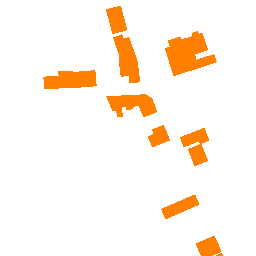

In [188]:
x = np.copy(label_img)
x = np.apply_along_axis(class_to_colour, 1, np.reshape(x, (256*256, 3)))
x = np.reshape(x, (256, 256, 3))
x = x.astype("uint8")
Image.fromarray(x)

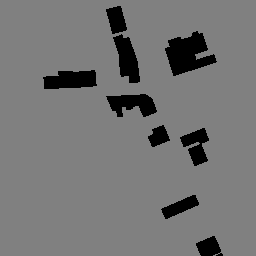

In [269]:
#np.zeros([360,480, ])
#label_img[:,:,0] == 6
height, width = 256, 256
masks = np.zeros((height, width, len(classes)+1))
for i in range(0, len(classes)+1):
    masks[:,:,i] = 1*(label_img[:,:,0] == i)
    
masks = masks.astype("float32")
x = (masks*128)
x = x.astype("uint8")

# background class (grey)
Image.fromarray(x[:,:,0])

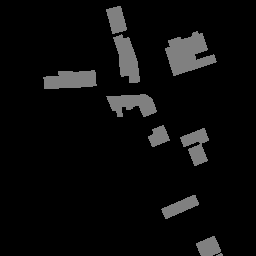

In [232]:
# building class (grey)
Image.fromarray(x[:,:,5])

In [247]:
instance_label = np.reshape(masks, (height*width, len(classes)+1))
instance_label

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [254]:
# image is in (height, width, channel) format
# move to (channel, height, width) format by shifting channel axis (2) to first place.
instance_image = np.rollaxis(sample_img, 2)

# normalise (could do other stuff here)
instance_image = instance_image/255
instance_image

array([[[ 0.0745098 ,  0.23921569,  0.18823529, ...,  0.4627451 ,
          0.48235294,  0.58431373],
        [ 0.23137255,  0.17647059,  0.31372549, ...,  0.49803922,
          0.58823529,  0.4627451 ],
        [ 0.55294118,  0.23529412,  0.38431373, ...,  0.3254902 ,
          0.36078431,  0.4745098 ],
        ..., 
        [ 0.12156863,  0.02745098,  0.09411765, ...,  0.18431373,
          0.01960784,  0.        ],
        [ 0.15686275,  0.07843137,  0.04705882, ...,  0.12941176,
          0.29411765,  0.43137255],
        [ 0.12156863,  0.09019608,  0.        , ...,  0.25490196,
          0.13333333,  0.        ]],

       [[ 0.15294118,  0.31764706,  0.29019608, ...,  0.45098039,
          0.4745098 ,  0.56862745],
        [ 0.30588235,  0.25490196,  0.40392157, ...,  0.48627451,
          0.58039216,  0.44705882],
        [ 0.61568627,  0.30980392,  0.47058824, ...,  0.31372549,
          0.35294118,  0.4627451 ],
        ..., 
        [ 0.14509804,  0.05098039,  0.12156863, ...,

In [287]:
num_classes = len(classes) + 1
images = []
labels = []

for i, row in non_empty.iterrows():
    
    print("processing image/mask {:06d}".format(i))
    
    sample_file = "{}/images/{}-{}-{}.jpg".format(skynet_data, *row[1:4])
    sample_img = cv2.imread(sample_file)
    assert sample_img.shape == (height, width, 3)
    sample_img = np.rollaxis(sample_img, 2)
    sample_img = sample_img/255
    images.append(sample_img)

    label_file = "{}/labels/color/{}-{}-{}.png".format(skynet_data, *row[1:4])
    label_img = cv2.imread(label_file)
    masks = np.zeros((height, width, len(classes)+1))
    for i in range(0, len(classes)+1):
        masks[:,:,i] = 1*(label_img[:,:,0] == i)
        
    masks = masks.astype("float32")
    masks = np.reshape(masks, (height*width, num_classes))
    labels.append(masks)

images = np.array(images)
labels = np.array(labels)

processing image/mask 000000
processing image/mask 000001
processing image/mask 000002
processing image/mask 000003
processing image/mask 000004
processing image/mask 000005
processing image/mask 000006
processing image/mask 000007
processing image/mask 000008
processing image/mask 000009
processing image/mask 000010
processing image/mask 000011
processing image/mask 000012
processing image/mask 000013
processing image/mask 000014
processing image/mask 000015
processing image/mask 000016
processing image/mask 000017
processing image/mask 000018
processing image/mask 000019
processing image/mask 000020
processing image/mask 000021
processing image/mask 000022
processing image/mask 000023
processing image/mask 000024
processing image/mask 000025
processing image/mask 000026
processing image/mask 000027
processing image/mask 000028
processing image/mask 000029
processing image/mask 000030
processing image/mask 000031
processing image/mask 000032
processing image/mask 000033
processing ima

processing image/mask 000288
processing image/mask 000289
processing image/mask 000290
processing image/mask 000291
processing image/mask 000292
processing image/mask 000293
processing image/mask 000294
processing image/mask 000295
processing image/mask 000296
processing image/mask 000297
processing image/mask 000298
processing image/mask 000299
processing image/mask 000300
processing image/mask 000301
processing image/mask 000302
processing image/mask 000303
processing image/mask 000304
processing image/mask 000305
processing image/mask 000306
processing image/mask 000307
processing image/mask 000308
processing image/mask 000309
processing image/mask 000310
processing image/mask 000311
processing image/mask 000312
processing image/mask 000313
processing image/mask 000314
processing image/mask 000315
processing image/mask 000316
processing image/mask 000317
processing image/mask 000318
processing image/mask 000319
processing image/mask 000320
processing image/mask 000321
processing ima

processing image/mask 000587
processing image/mask 000588
processing image/mask 000589
processing image/mask 000590
processing image/mask 000591
processing image/mask 000592
processing image/mask 000593
processing image/mask 000594
processing image/mask 000595
processing image/mask 000596
processing image/mask 000597
processing image/mask 000598
processing image/mask 000599
processing image/mask 000600
processing image/mask 000601
processing image/mask 000602
processing image/mask 000603
processing image/mask 000604
processing image/mask 000605
processing image/mask 000606
processing image/mask 000607
processing image/mask 000608
processing image/mask 000609
processing image/mask 000610
processing image/mask 000611
processing image/mask 000612
processing image/mask 000613
processing image/mask 000614
processing image/mask 000615
processing image/mask 000616
processing image/mask 000617
processing image/mask 000618
processing image/mask 000619
processing image/mask 000620
processing ima

processing image/mask 000885
processing image/mask 000886
processing image/mask 000887
processing image/mask 000888
processing image/mask 000889
processing image/mask 000890
processing image/mask 000891
processing image/mask 000892
processing image/mask 000893
processing image/mask 000894
processing image/mask 000895
processing image/mask 000896
processing image/mask 000897
processing image/mask 000898
processing image/mask 000899
processing image/mask 000900
processing image/mask 000901
processing image/mask 000902
processing image/mask 000903
processing image/mask 000904
processing image/mask 000905
processing image/mask 000906
processing image/mask 000907
processing image/mask 000908
processing image/mask 000909
processing image/mask 000910
processing image/mask 000911
processing image/mask 000912
processing image/mask 000913
processing image/mask 000914
processing image/mask 000915
processing image/mask 000916
processing image/mask 000917
processing image/mask 000918
processing ima

processing image/mask 001181
processing image/mask 001182
processing image/mask 001183
processing image/mask 001184
processing image/mask 001185
processing image/mask 001186
processing image/mask 001187
processing image/mask 001188
processing image/mask 001189
processing image/mask 001190
processing image/mask 001191
processing image/mask 001192
processing image/mask 001193
processing image/mask 001194
processing image/mask 001195
processing image/mask 001196
processing image/mask 001197
processing image/mask 001198
processing image/mask 001199
processing image/mask 001200
processing image/mask 001201
processing image/mask 001202
processing image/mask 001203
processing image/mask 001204
processing image/mask 001205
processing image/mask 001206
processing image/mask 001207
processing image/mask 001208
processing image/mask 001209
processing image/mask 001210
processing image/mask 001211
processing image/mask 001212
processing image/mask 001213
processing image/mask 001214
processing ima

processing image/mask 001479
processing image/mask 001480
processing image/mask 001481
processing image/mask 001482
processing image/mask 001483
processing image/mask 001484
processing image/mask 001485
processing image/mask 001486
processing image/mask 001487
processing image/mask 001488
processing image/mask 001489
processing image/mask 001490
processing image/mask 001491
processing image/mask 001492
processing image/mask 001493
processing image/mask 001494
processing image/mask 001495
processing image/mask 001496
processing image/mask 001497
processing image/mask 001498
processing image/mask 001499
processing image/mask 001500
processing image/mask 001501
processing image/mask 001502
processing image/mask 001503
processing image/mask 001504
processing image/mask 001505
processing image/mask 001506
processing image/mask 001507
processing image/mask 001508
processing image/mask 001509
processing image/mask 001510
processing image/mask 001511
processing image/mask 001512
processing ima

processing image/mask 001767
processing image/mask 001768
processing image/mask 001769
processing image/mask 001770
processing image/mask 001771
processing image/mask 001772
processing image/mask 001773
processing image/mask 001774
processing image/mask 001775
processing image/mask 001776
processing image/mask 001777
processing image/mask 001778
processing image/mask 001779
processing image/mask 001780
processing image/mask 001781
processing image/mask 001782
processing image/mask 001783
processing image/mask 001784
processing image/mask 001785
processing image/mask 001786
processing image/mask 001787
processing image/mask 001788
processing image/mask 001789
processing image/mask 001790
processing image/mask 001791
processing image/mask 001792
processing image/mask 001793
processing image/mask 001794
processing image/mask 001795
processing image/mask 001796
processing image/mask 001797
processing image/mask 001798
processing image/mask 001799
processing image/mask 001800
processing ima

processing image/mask 002067
processing image/mask 002068
processing image/mask 002069
processing image/mask 002070
processing image/mask 002071
processing image/mask 002072
processing image/mask 002073
processing image/mask 002074
processing image/mask 002075
processing image/mask 002076
processing image/mask 002077
processing image/mask 002078
processing image/mask 002079
processing image/mask 002080
processing image/mask 002081
processing image/mask 002082
processing image/mask 002083
processing image/mask 002084
processing image/mask 002085
processing image/mask 002086
processing image/mask 002087
processing image/mask 002088
processing image/mask 002089
processing image/mask 002090
processing image/mask 002091
processing image/mask 002092
processing image/mask 002093
processing image/mask 002094
processing image/mask 002095
processing image/mask 002096
processing image/mask 002097
processing image/mask 002098
processing image/mask 002099
processing image/mask 002100
processing ima

processing image/mask 002356
processing image/mask 002357
processing image/mask 002358
processing image/mask 002359
processing image/mask 002360
processing image/mask 002361
processing image/mask 002362
processing image/mask 002363
processing image/mask 002364
processing image/mask 002365
processing image/mask 002366
processing image/mask 002367
processing image/mask 002368
processing image/mask 002369
processing image/mask 002370
processing image/mask 002371
processing image/mask 002372
processing image/mask 002373
processing image/mask 002374
processing image/mask 002375
processing image/mask 002376
processing image/mask 002377
processing image/mask 002378
processing image/mask 002379
processing image/mask 002380
processing image/mask 002381
processing image/mask 002382
processing image/mask 002383
processing image/mask 002384
processing image/mask 002385
processing image/mask 002386
processing image/mask 002387
processing image/mask 002388
processing image/mask 002389
processing ima

processing image/mask 002646
processing image/mask 002647
processing image/mask 002648
processing image/mask 002649
processing image/mask 002650
processing image/mask 002651
processing image/mask 002652
processing image/mask 002653
processing image/mask 002654
processing image/mask 002655
processing image/mask 002656
processing image/mask 002657
processing image/mask 002658
processing image/mask 002659
processing image/mask 002660
processing image/mask 002661
processing image/mask 002662
processing image/mask 002663
processing image/mask 002664
processing image/mask 002665
processing image/mask 002666
processing image/mask 002667
processing image/mask 002668
processing image/mask 002669
processing image/mask 002670
processing image/mask 002671
processing image/mask 002672
processing image/mask 002673
processing image/mask 002674
processing image/mask 002675
processing image/mask 002676
processing image/mask 002677
processing image/mask 002678
processing image/mask 002679
processing ima

processing image/mask 002946
processing image/mask 002947
processing image/mask 002948
processing image/mask 002949
processing image/mask 002950
processing image/mask 002951
processing image/mask 002952
processing image/mask 002953
processing image/mask 002954
processing image/mask 002955
processing image/mask 002956
processing image/mask 002957
processing image/mask 002958
processing image/mask 002959
processing image/mask 002960
processing image/mask 002961
processing image/mask 002962
processing image/mask 002963
processing image/mask 002964
processing image/mask 002965
processing image/mask 002966
processing image/mask 002967
processing image/mask 002968
processing image/mask 002969
processing image/mask 002970
processing image/mask 002971
processing image/mask 002972
processing image/mask 002973
processing image/mask 002974
processing image/mask 002975
processing image/mask 002976
processing image/mask 002977
processing image/mask 002978
processing image/mask 002979
processing ima

processing image/mask 003245
processing image/mask 003246
processing image/mask 003247
processing image/mask 003248
processing image/mask 003249
processing image/mask 003250
processing image/mask 003251
processing image/mask 003252
processing image/mask 003253
processing image/mask 003254
processing image/mask 003255
processing image/mask 003256
processing image/mask 003257
processing image/mask 003258
processing image/mask 003259
processing image/mask 003260
processing image/mask 003261
processing image/mask 003262
processing image/mask 003263
processing image/mask 003264
processing image/mask 003265
processing image/mask 003266
processing image/mask 003267
processing image/mask 003268
processing image/mask 003269
processing image/mask 003270
processing image/mask 003271
processing image/mask 003272
processing image/mask 003273
processing image/mask 003274
processing image/mask 003275
processing image/mask 003276
processing image/mask 003277
processing image/mask 003278
processing ima

processing image/mask 003533
processing image/mask 003534
processing image/mask 003535
processing image/mask 003536
processing image/mask 003537
processing image/mask 003538
processing image/mask 003539
processing image/mask 003540
processing image/mask 003541
processing image/mask 003542
processing image/mask 003543
processing image/mask 003544
processing image/mask 003545
processing image/mask 003546
processing image/mask 003547
processing image/mask 003548
processing image/mask 003549
processing image/mask 003550
processing image/mask 003551
processing image/mask 003552
processing image/mask 003553
processing image/mask 003554
processing image/mask 003555
processing image/mask 003556
processing image/mask 003557
processing image/mask 003558
processing image/mask 003559
processing image/mask 003560
processing image/mask 003561
processing image/mask 003562
processing image/mask 003563
processing image/mask 003564
processing image/mask 003565
processing image/mask 003566
processing ima

In [306]:
images

array([[[[ 0.2627451 ,  0.24705882,  0.23137255, ...,  0.27058824,
           0.28235294,  0.26666667],
         [ 0.30588235,  0.29019608,  0.26666667, ...,  0.30980392,
           0.29411765,  0.27058824],
         [ 0.26666667,  0.26666667,  0.2627451 , ...,  0.29019608,
           0.28627451,  0.29019608],
         ..., 
         [ 0.24705882,  0.2627451 ,  0.27843137, ...,  0.25882353,
           0.25490196,  0.32941176],
         [ 0.23921569,  0.24313725,  0.25098039, ...,  0.31764706,
           0.29803922,  0.36078431],
         [ 0.23921569,  0.23529412,  0.23529412, ...,  0.32156863,
           0.27843137,  0.32156863]],

        [[ 0.2745098 ,  0.25882353,  0.24313725, ...,  0.32156863,
           0.33333333,  0.31764706],
         [ 0.31764706,  0.30196078,  0.27843137, ...,  0.36078431,
           0.34509804,  0.32156863],
         [ 0.27843137,  0.27843137,  0.2745098 , ...,  0.34117647,
           0.3372549 ,  0.34117647],
         ..., 
         [ 0.26666667,  0.282352